## Phần 3: Phân tích dữ liệu

### Bước 0: Nạp dữ liệu tổng vào jupyter

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('WeeklyWeather_VN.csv',encoding='utf-8-sig')
df.head()

,ThoiGian,TinhThanh,NhietDo (°C),LuongMua (mm),DoAm (%),DoAmTrongNha (%),KhiAp (mb),MatDoMay (%),TamNhin (km),AQI,...,PM2_Matdo(µg/m³),PM10_TrangThai,PM10_ChiSo,PM10_Matdo(µg/m³),SO2_TrangThai,SO2_ChiSo,SO2_Matdo(µg/m³),NO2_TrangThai,NO2_ChiSo,NO2_Matdo(µg/m³)
0,2024-06-07,An Giang,33.143,7.229,59.143,59.143,1008.429,80.429,24.0,29.857,...,8.143,Fair,21.714,16.714,Excellent,12.571,37.714,Excellent,6.571,3.429
1,2024-06-07,Bà Rịa - Vũng Tàu,32.200,27.020,71.000,71.000,1008.000,76.000,24.0,33.600,...,9.400,Fair,23.200,18.200,Excellent,15.200,46.400,Excellent,6.200,6.000
2,2024-06-07,Bình Dương,34.000,17.700,58.857,58.857,1006.571,88.714,24.0,33.143,...,9.143,Fair,21.286,16.286,Excellent,11.857,34.857,Excellent,9.714,6.286
3,2024-06-07,Bình Phước,30.900,5.380,68.500,68.500,1009.300,82.800,23.7,32.700,...,9.300,Fair,20.500,15.500,Excellent,12.700,37.800,Excellent,7.100,4.300
4,2024-06-07,Bình Thuận,31.714,4.390,65.048,65.048,1009.286,82.714,24.0,39.048,...,11.524,Fair,26.286,21.286,Excellent,17.333,51.571,Excellent,5.000,3.524


In [3]:
df['ThoiGian'].value_counts()

2024-06-07    63
2024-06-08    63
2024-06-09    63
2024-06-10    63
2024-06-11    63
2024-06-12    63
2024-06-13    63
Name: ThoiGian, dtype: int64

### Bước 1: Trực quan hóa dữ liệu

Trực quan hóa dữ liệu thời tiết là 1 cách thông dụng để ta có thể nhìn thấy sự biến đổi của thời tiết, về sự khác biệt trong khí hậu của các khu vực. Trong phần tìm hiểu này, chúng tôi sẽ trực quan thông qua một vài loại biểu đồ

### 1. Một số biểu đồ tổng quát

#### Theo thời gian

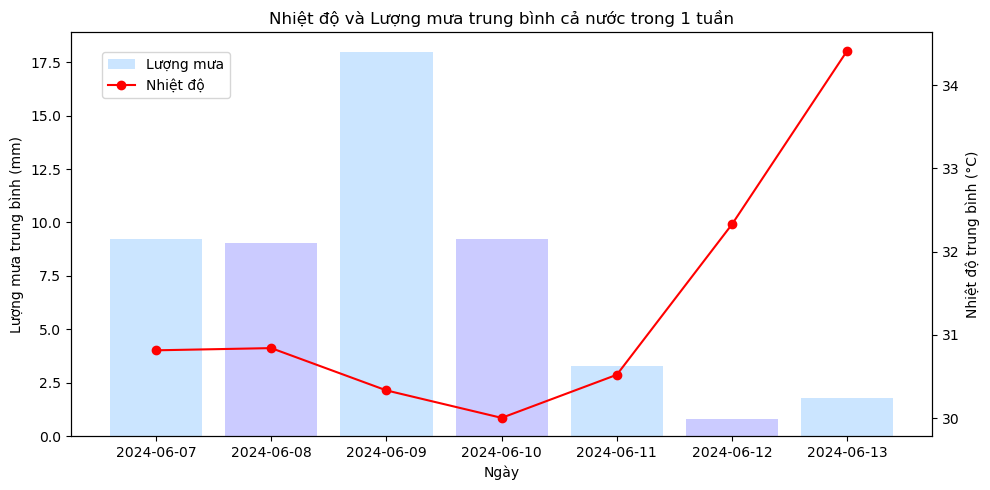

In [26]:
# Gộp dữ liệu nhiệt độ
df_temp_grouped = df.groupby('ThoiGian')['NhietDo (°C)'].mean().reset_index()

# Gộp dữ liệu lượng mưa
df_rain_grouped = df.groupby('ThoiGian')['LuongMua (mm)'].mean().reset_index()

fig, ax1 = plt.subplots(figsize=(10, 5))

# Biểu đồ cho lượng mưa trên trục bên trái
ax1.bar(df_rain_grouped['ThoiGian'], df_rain_grouped['LuongMua (mm)'], color=['#99ccff', '#9999ff'], alpha=0.5, label='Lượng mưa')
ax1.set_xlabel('Ngày')
ax1.set_ylabel('Lượng mưa trung bình (mm)')
ax1.tick_params(axis='y')

# Tạo trục thứ hai cho nhiệt độ bên phải
ax2 = ax1.twinx()
ax2.plot(df_temp_grouped['ThoiGian'], df_temp_grouped['NhietDo (°C)'], marker='o', color='red', label='Nhiệt độ')
ax2.set_ylabel('Nhiệt độ trung bình (°C)')
ax2.tick_params(axis='y')

# Hiển thị chú thích
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

plt.title('Nhiệt độ và Lượng mưa trung bình cả nước trong 1 tuần')
plt.tight_layout()
plt.show()


#### Theo tỉnh thành

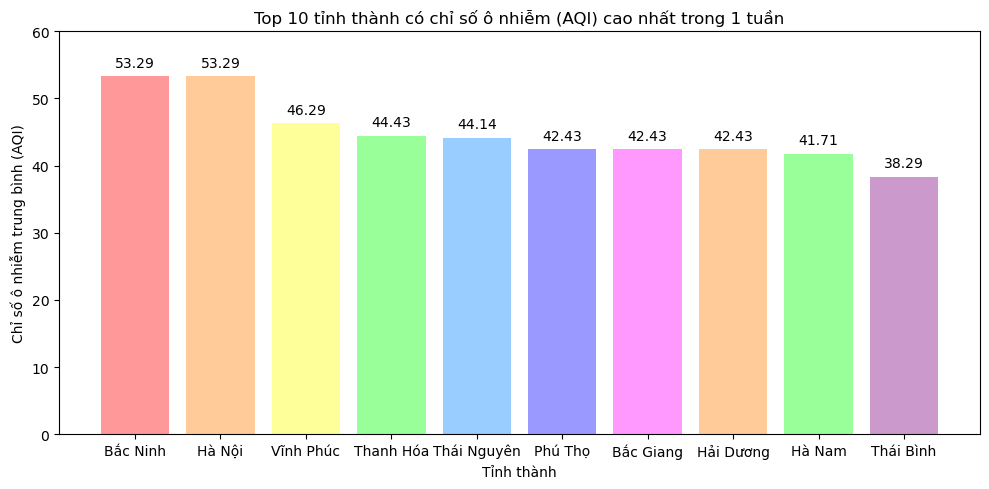

In [57]:
# Nhóm dữ liệu theo cột TinhThanh và tính trung bình AQI
df_grouped = df.groupby('TinhThanh')['AQI'].mean().reset_index()

# Sắp xếp kết quả theo giá trị trung bình AQI giảm dần và lấy 10 tỉnh thành có AQI cao nhất
df_top10 = df_grouped.sort_values(by='AQI', ascending=False).head(10)

# Tạo một danh sách các màu sắc
colors = ['#ff9999', '#ffcc99', '#ffff99', '#99ff99', '#99ccff', '#9999ff', '#ff99ff', '#ffcc99', '#99ff99', '#cc99cc']

# Vẽ biểu đồ cột cho 10 tỉnh thành này
plt.figure(figsize=(10, 5))
bars = plt.bar(df_top10['TinhThanh'], df_top10['AQI'], color=colors)
plt.ylim(0, 60)

# Thêm giá trị của từng cột
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval, 2), ha='center', va='bottom')

plt.title('Top 10 tỉnh thành có chỉ số ô nhiễm (AQI) cao nhất trong 1 tuần')
plt.xlabel('Tỉnh thành')
plt.ylabel('Chỉ số ô nhiễm trung bình (AQI)')
plt.tight_layout()
plt.show()


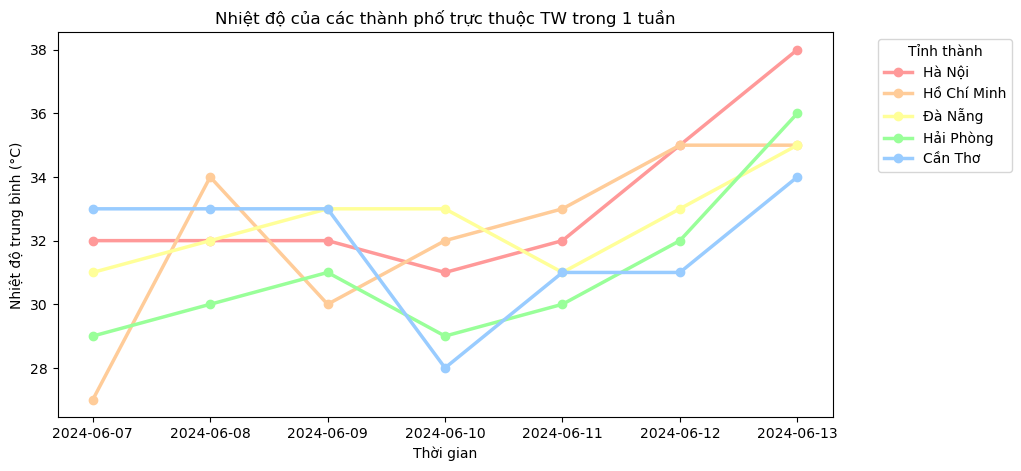

In [25]:
# Các thành phố trực thuộc trung ương
cities = ['Hà Nội', 'Hồ Chí Minh', 'Đà Nẵng', 'Hải Phòng', 'Cần Thơ']
colors = ['#ff9999', '#ffcc99', '#ffff99', '#99ff99', '#99ccff']
# Tạo biểu đồ đường
plt.figure(figsize=(10, 5))

# Vẽ các đường thẳng cho mỗi khung ngày
for city, color in zip(cities, colors):
    df_city = df[df['TinhThanh'] == city]
    plt.plot(df_city['ThoiGian'], df_city['NhietDo (°C)'], marker='o', color=color, label=city, linewidth=2.5)

plt.title('Nhiệt độ của các thành phố trực thuộc TW trong 1 tuần')
plt.xlabel('Thời gian')
plt.ylabel('Nhiệt độ trung bình (°C)')
plt.legend(title='Tỉnh thành', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


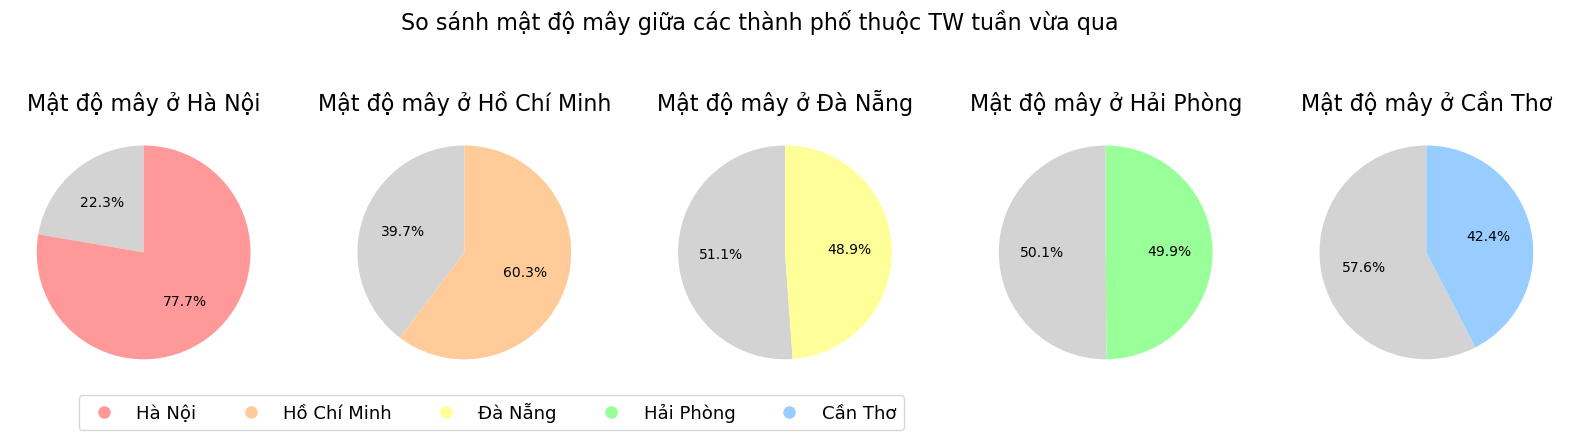

In [68]:

# Danh sách các thành phố và màu sắc tương ứng
cities = ['Hà Nội', 'Hồ Chí Minh', 'Đà Nẵng', 'Hải Phòng', 'Cần Thơ']
colors = ['#ff9999', '#ffcc99', '#ffff99', '#99ff99', '#99ccff']

# Tạo figure với 5 subplots (1 hàng, 5 cột)
fig, axs = plt.subplots(1, len(cities), figsize=(20, 5))
labels = ['Trống', 'Mật độ mây']

# Vẽ biểu đồ pie cho mật độ mây của từng thành phố
for i, (city, color) in enumerate(zip(cities, colors)):
    df_city = df[df['TinhThanh'] == city]
    avg_cloud_density = df_city['MatDoMay (%)'].mean()
    sizes = [100 - avg_cloud_density, avg_cloud_density]
    axs[i].pie(sizes, colors=['lightgray', color], autopct='%1.1f%%', startangle=90)
    axs[i].set_title(f'Mật độ mây ở {city}', fontsize=16)

# Thiết lập tiêu đề chung cho tất cả các subplot
plt.suptitle('So sánh mật độ mây giữa các thành phố thuộc TW tuần vừa qua', fontsize=16)
legend_labels = [plt.Line2D([0], [0], marker='o', color='w', label=city, markerfacecolor=color, markersize=10) for city, color in zip(cities, colors)]
plt.legend(handles=legend_labels, labels=cities, loc='center', bbox_to_anchor=(-3,-0.1), ncol=len(cities),fontsize=13)
plt.show()


Text(0.5, 1.0, 'Trung bình các chỉ số khí')

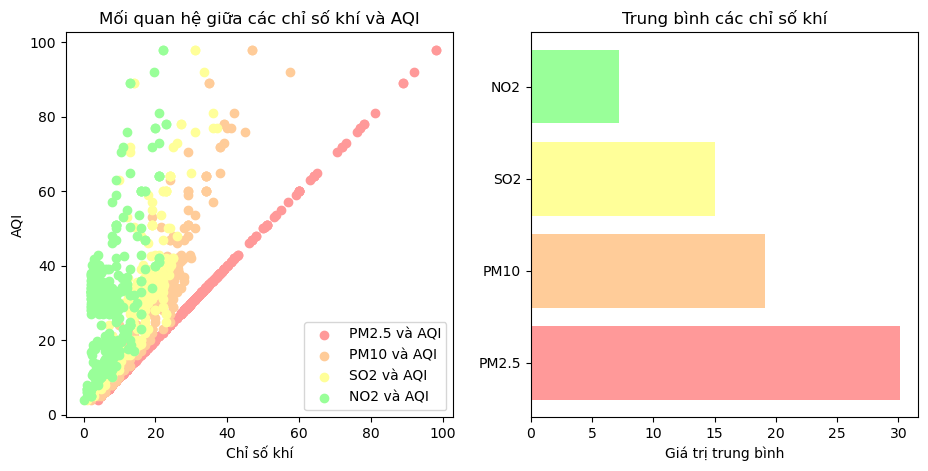

In [24]:
plt.figure(figsize=(11,5))
plt.subplot(1, 2, 1)
plt.scatter(df['PM2_ChiSo'], df['AQI'], color='#ff9999', label='PM2.5 và AQI')
plt.scatter(df['PM10_ChiSo'], df['AQI'], color='#ffcc99', label='PM10 và AQI')
plt.scatter(df['SO2_ChiSo'], df['AQI'], color='#ffff99', label='SO2 và AQI')
plt.scatter(df['NO2_ChiSo'], df['AQI'], color='#99ff99', label='NO2 và AQI')
plt.xlabel('Chỉ số khí')
plt.ylabel('AQI')
plt.title('Mối quan hệ giữa các chỉ số khí và AQI')
plt.legend()

plt.subplot(1, 2, 2)  
df_mean = df.groupby('TinhThanh')[['PM2_ChiSo', 'PM10_ChiSo', 'SO2_ChiSo', 'NO2_ChiSo']].mean().reset_index()
df_mean.drop(columns=['TinhThanh'],inplace=True)
overall_mean = df_mean.mean()
colors = ['#ff9999', '#ffcc99', '#ffff99', '#99ff99']
bar_labels = ['PM2.5', 'PM10', 'SO2', 'NO2']
plt.barh(bar_labels, overall_mean, color=colors)
plt.xlabel('Giá trị trung bình')
plt.title('Trung bình các chỉ số khí')

### 2. Một số biểu đồ chi tiết

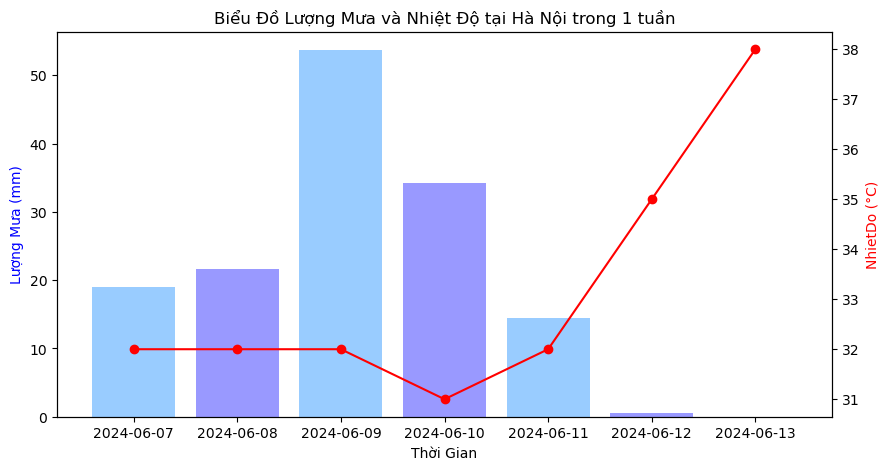

In [4]:
df_hanoi = df[df['TinhThanh'] == 'Hà Nội']

# Tạo biểu đồ
fig, ax1 = plt.subplots(figsize=(10, 5))

# Vẽ biểu đồ cho cột "LuongMua" trên trục y bên trái
ax1.bar(df_hanoi['ThoiGian'], df_hanoi['LuongMua (mm)'],color=['#99ccff', '#9999ff'])
ax1.set_xlabel('Thời Gian')
ax1.set_ylabel('Lượng Mưa (mm)', color='blue')

# Tạo một trục y thứ hai để vẽ biểu đồ cho cột "NhietDo" trên trục y bên phải
ax2 = ax1.twinx()
ax2.plot(df_hanoi['ThoiGian'], df_hanoi['NhietDo (°C)'], color='red', marker='o')
ax2.set_ylabel('NhietDo (°C)', color='red')

# Đặt tiêu đề biểu đồ
plt.title('Biểu Đồ Lượng Mưa và Nhiệt Độ tại Hà Nội trong 1 tuần')

# Hiển thị biểu đồ
plt.show()

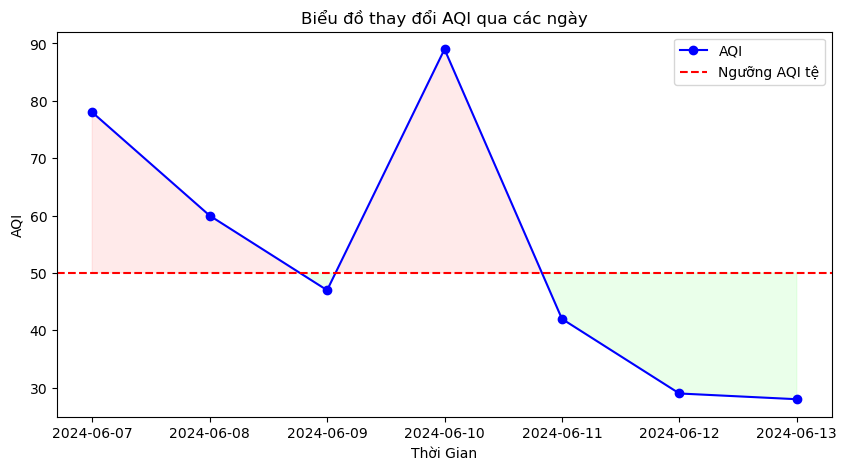

In [23]:
ThoiGian = df_hanoi['ThoiGian']
AQI = df_hanoi['AQI']

AQI_limit = 50

# Vẽ biểu đồ
plt.figure(figsize=(10, 5))
plt.plot(ThoiGian, AQI, marker='o', linestyle='-', color='b', label='AQI')
plt.axhline(y=AQI_limit, color='r', linestyle='--', label='Ngưỡng AQI tệ')
plt.fill_between(ThoiGian, AQI, AQI_limit, where=(AQI > AQI_limit), interpolate=True, color='#ff9999', alpha=0.2)
plt.fill_between(ThoiGian, AQI, AQI_limit, where=(AQI <= AQI_limit), interpolate=True, color='#99ff99', alpha=0.2)
plt.xlabel('Thời Gian')
plt.ylabel('AQI')
plt.title('Biểu đồ thay đổi AQI qua các ngày')
plt.legend()

# Hiển thị biểu đồ
plt.show()

### Bước 2: Mô hình hóa dữ liệu

Mô hình hóa dữ liệu là một phương pháp giúp máy tính học và tìm ra các mối tương quan giữa các DL. Mô hình hóa DL hõ trợ ta đưa ra một quyết định nào đó trong tương lai hoặc giúp ta dự đoán một điểm dữ liệu mới

### 1. Xây dựng mô hình dự đoán nhiệt độ bằng hồi quy tuyến tính

__1.1. Nhập tập dữ liệu cần huấn luyện__

In [10]:
import pandas as pd
train_df = pd.read_csv('./WeeklyWeather_VN.csv')

train_df.head(2)

,ThoiGian,TinhThanh,NhietDo (°C),LuongMua (mm),DoAm (%),DoAmTrongNha (%),KhiAp (mb),MatDoMay (%),TamNhin (km),AQI,...,PM2_Matdo(µg/m³),PM10_TrangThai,PM10_ChiSo,PM10_Matdo(µg/m³),SO2_TrangThai,SO2_ChiSo,SO2_Matdo(µg/m³),NO2_TrangThai,NO2_ChiSo,NO2_Matdo(µg/m³)
0,2024-06-07,An Giang,33.143,7.229,59.143,59.143,1008.429,80.429,24.0,29.857,...,8.143,Fair,21.714,16.714,Excellent,12.571,37.714,Excellent,6.571,3.429
1,2024-06-07,Bà Rịa - Vũng Tàu,32.200,27.020,71.000,71.000,1008.000,76.000,24.0,33.600,...,9.400,Fair,23.200,18.200,Excellent,15.200,46.400,Excellent,6.200,6.000


__1.2 Loại bỏ một số biến không cần thiết__
- Các biến về chỉ số không khí không đóng góp về mặt dự đoán khí hậu
- Một số biến chung về thời gian, tỉnh thành
- Biến trạng thái không khí chỉ mô tả không khí theo lời, không có nhiều ý nghĩa về mặt dự đoán

In [11]:
train_df.drop(columns=['ThoiGian','TinhThanh','TrangThaiKhongKhi',
                 'SO2_TrangThai','SO2_Matdo(µg/m³)','SO2_ChiSo',
                 'PM2_TrangThai','PM2_Matdo(µg/m³)','PM2_ChiSo',
                 'NO2_TrangThai','NO2_Matdo(µg/m³)','NO2_ChiSo',
                 'PM10_TrangThai','PM10_Matdo(µg/m³)','PM10_ChiSo'],inplace=True)

__1.3 Huấn luyện mô hình hồi quy tuyến tính__

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Chọn các cột đầu vào và cột mục tiêu
X = train_df[['LuongMua (mm)', 'DoAm (%)', 'DoAmTrongNha (%)', 'KhiAp (mb)', 'MatDoMay (%)', 'TamNhin (km)', 'AQI']]
y = train_df['NhietDo (°C)']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Khởi tạo mô hình hồi quy tuyến tính
model = LinearRegression()

# Huấn luyện mô hình
model.fit(X_train_scaled, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test_scaled)

# Đánh giá mô hình
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'R-squared: {r2}')
print(f'MAE: {mae}')
print(f'MSE: {mse}')

R-squared: 0.9147882012090343
MAE: 0.6325543593201455
MSE: 0.6205777459016398


#### Lấy ra các hệ số để đưa vào Excel, tạo ra nơi giúp người dùng dự đoán giá trị mới

Sau đó nhóm sẽ tinh chỉnh lại File Excel này để bố cục thân thiện hơn với người sử dụng

In [13]:
data_to_save = {
    'Coefficient': model.coef_,
    'Mean': scaler.mean_,
    'Scale': scaler.scale_
}

# Tạo DataFrame từ dữ liệu
constant = pd.DataFrame(data_to_save)

# Thêm cột 'Intercept' và đặt giá trị cho cột 'Intercept'
constant['Intercept'] = [model.intercept_] + [None] * (len(data_to_save['Coefficient']) - 1)

# Lưu DataFrame vào file Excel
constant.to_excel('.\model\DuDoanNhietDo.xlsx', index=False)

### 2. Xây dựng mô hình dự đoán trời mưa bằng hồi quy logistic

Đọc dữ liệu và loại bỏ các cột không cần thiết

In [34]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn import metrics
import matplotlib.pyplot as plt

# Đọc dữ liệu
train_df = pd.read_csv('./WeeklyWeather_VN.csv')

# Loại bỏ các cột không cần thiết
train_df.drop(columns=[
    'ThoiGian', 'TinhThanh', 'TrangThaiKhongKhi', 'AQI', 'DoAmTrongNha (%)',
    'SO2_TrangThai', 'SO2_Matdo(µg/m³)', 'SO2_ChiSo',
    'PM2_TrangThai', 'PM2_Matdo(µg/m³)', 'PM2_ChiSo',
    'NO2_TrangThai', 'NO2_Matdo(µg/m³)', 'NO2_ChiSo',
    'PM10_TrangThai', 'PM10_Matdo(µg/m³)', 'PM10_ChiSo'
], inplace=True)

#### Tạo ra cột Rain từ biến LuongMua:
Ở đây, nhóm cho rằng nếu lượng mưa dưới 1 mm, vậy đây có thể là hành vi mưa bóng mây, thường xảy ra cục bộ chứ không thể hiện biểu hiện thời tiết của toàn bộ tỉnh thành. Vì vậy nhóm quyết định chọn lượng mưa >= 1 mm. Ngoài ra, sử dụng phân chia bằng 1mm, DL được chia làm 75%, 25%, phù hợp để huấn luyện mô hình

- Nếu LuongMua >= 1mm: có mưa -> Rain = 1
- Ngược lại, Rain = 0

Loại bỏ biến LuongMua

In [35]:
# Tạo cột Rain từ cột TrangThai
def detect(value):
    if value >= 1:
        return 1
    return 0

train_df['Rain'] = train_df['LuongMua (mm)'].apply(detect)
train_df.drop(['LuongMua (mm)'],inplace=True, axis=1)

#### Huấn luyện mô hình và đánh giá hiệu suất

In [47]:
# Tách biến độc lập (X) và biến mục tiêu (y)
X = train_df.drop(columns=['Rain'])
y = train_df['Rain']

# RandomUnderSampling
rus = RandomUnderSampler(sampling_strategy=0.5, random_state=50) 
X_resampled, y_resampled = rus.fit_resample(X, y)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=50)

# Khởi tạo và huấn luyện mô hình logistic regression
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

# Dự đoán xác suất trên tập kiểm tra
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Đặt ngưỡng tùy chỉnh
threshold = 0.6 #0.6
y_pred_custom_thresh = (y_pred_prob >= threshold).astype(int)

# Đánh giá mô hình với ngưỡng tùy chỉnh
accuracy = accuracy_score(y_test, y_pred_custom_thresh)
precision = precision_score(y_test, y_pred_custom_thresh)
conf_matrix = confusion_matrix(y_test, y_pred_custom_thresh)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.8264462809917356
Precision: 0.8481012658227848
Confusion Matrix:
[[33 12]
 [ 9 67]]


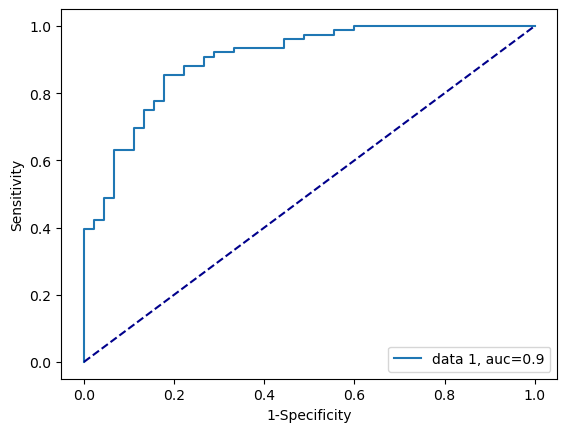

In [48]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = round(metrics.roc_auc_score(y_test, y_pred_proba), 5)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.plot([0,1],[0,1],color = 'darkblue', linestyle='--')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.legend(loc=4)
plt.show()

#### Lấy ra các hệ số để đưa vào Excel, tạo ra nơi giúp người dùng dự đoán giá trị mới

Sau đó nhóm sẽ tinh chỉnh lại File Excel này để bố cục thân thiện hơn với người sử dụng

In [39]:
coefficients = model.coef_
intercept = model.intercept_

columns = list(X_train.columns) + ['Intercept']
data = [list(coef) + [intercept[0]] for coef in coefficients]
df_coefficients = pd.DataFrame(data, columns=columns)

df_coefficients.to_excel('./model/DuDoanTroiMua.xlsx', index=False)